# TSA Mini Project



# Himanshu Kakwani 60009200067
# Sharvari Chawade 60009200037
# Varun Gajara 60009200049

## Installing necessary libraries and packages

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
# !pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.arima.model import ARIMA
import scipy.stats
import pylab
# import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn import metrics
# from pmdarima import auto_arima
from arch import arch_model

## Describing the data

In [ ]:
start_date = '2010-01-01'
end_date = '2022-12-1'

In [ ]:
pred_start_date = '2022-11-1'
pred_end_date = '2022-12-1'

In [ ]:
# user_input = input('Enter Stock Ticker: ')

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime
import pandas as pd
yf.pdr_override()
y_symbols = 'TCS.NS'
startdate = datetime(2010,1,1)
enddate = datetime(2022,12,1)
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,377.399994,379.450012,374.524994,375.825012,295.672577,1963682
2010-01-05,377.500000,379.774994,373.274994,375.924988,295.751373,2014488
2010-01-06,375.924988,376.100006,366.500000,367.424988,289.064056,3349176
2010-01-07,367.750000,369.700012,355.500000,357.200012,281.019775,6474892
2010-01-08,358.000000,359.250000,348.250000,349.899994,275.276642,6048178
...,...,...,...,...,...,...
2022-11-24,3316.250000,3392.949951,3308.300049,3380.149902,3380.149902,1296591
2022-11-25,3383.000000,3403.350098,3348.000000,3389.649902,3389.649902,1588981
2022-11-28,3366.000000,3417.000000,3365.550049,3395.250000,3395.250000,2195437


In [ ]:
df = pd.DataFrame(data)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,377.399994,379.450012,374.524994,375.825012,295.672577,1963682
2010-01-05,377.500000,379.774994,373.274994,375.924988,295.751373,2014488
2010-01-06,375.924988,376.100006,366.500000,367.424988,289.064056,3349176
2010-01-07,367.750000,369.700012,355.500000,357.200012,281.019775,6474892
2010-01-08,358.000000,359.250000,348.250000,349.899994,275.276642,6048178
...,...,...,...,...,...,...
2022-11-24,3316.250000,3392.949951,3308.300049,3380.149902,3380.149902,1296591
2022-11-25,3383.000000,3403.350098,3348.000000,3389.649902,3389.649902,1588981
2022-11-28,3366.000000,3417.000000,3365.550049,3395.250000,3395.250000,2195437


In [ ]:
# df.to_csv('TCS_stock')

## Data pre-processing and cleaning

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3.187000e+03
mean,1548.173822,1564.234301,1530.963410,1547.483213,1434.451021,2.843830e+06
std,951.943533,960.213294,942.343257,951.120668,974.907456,2.305081e+06
min,352.000000,357.000000,342.625000,349.774994,275.276642,0.000000e+00
25%,726.500000,732.262512,718.812500,726.299988,601.974792,1.754159e+06
50%,1258.250000,1268.474976,1246.000000,1256.900024,1111.959106,2.382696e+06
75%,2085.000000,2109.574951,2060.900024,2082.274902,1975.033508,3.354711e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502686,8.806715e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3187 entries, 2010-01-04 to 2022-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3187 non-null   float64
 1   High       3187 non-null   float64
 2   Low        3187 non-null   float64
 3   Close      3187 non-null   float64
 4   Adj Close  3187 non-null   float64
 5   Volume     3187 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 174.3 KB


In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Visualising the trends for the past 12 years for the given stock

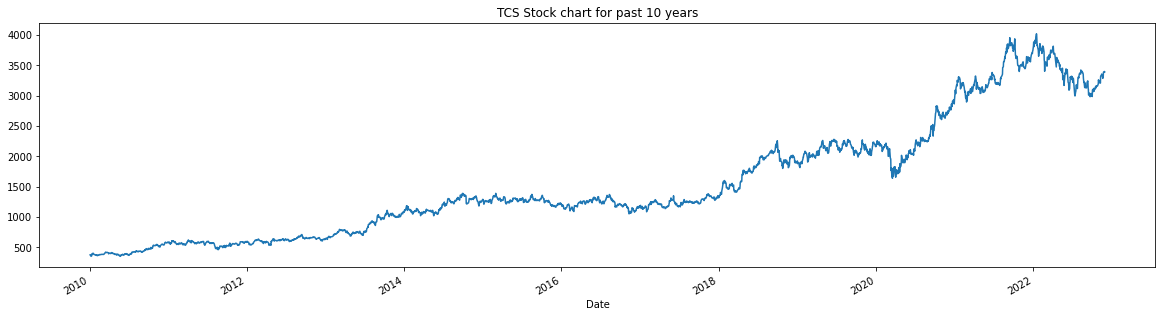

In [ ]:
df.Close.plot(figsize = (20,5), title = 'TCS Stock chart for past 10 years')

QQ plot depicts that the data is not normally distributed, this is expected from a time series data

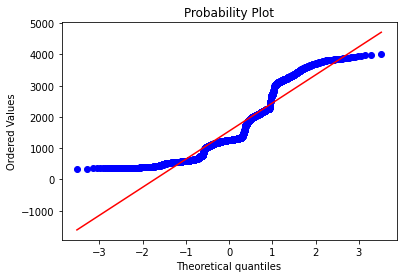

In [ ]:
scipy.stats.probplot(df.Close, plot = pylab)
pylab.show()

In [ ]:
df1 = df.asfreq('b') 
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,377.399994,379.450012,374.524994,375.825012,295.672577,1963682.0
2010-01-05,377.500000,379.774994,373.274994,375.924988,295.751373,2014488.0
2010-01-06,375.924988,376.100006,366.500000,367.424988,289.064056,3349176.0
2010-01-07,367.750000,369.700012,355.500000,357.200012,281.019775,6474892.0
2010-01-08,358.000000,359.250000,348.250000,349.899994,275.276642,6048178.0
...,...,...,...,...,...,...
2022-11-24,3316.250000,3392.949951,3308.300049,3380.149902,3380.149902,1296591.0
2022-11-25,3383.000000,3403.350098,3348.000000,3389.649902,3389.649902,1588981.0
2022-11-28,3366.000000,3417.000000,3365.550049,3395.250000,3395.250000,2195437.0


Missing value imputation done by the method of forward filling


In [ ]:
df1.Close = df1.Close.fillna(method ='ffill') #forward filling

splitting data

In [ ]:

size = int(len(df1)*0.8)
df_tr = df1.iloc[:size]
df_te = df1.iloc[size:]

## Data Decomposition

Decomposing and analysing different components of the time series data

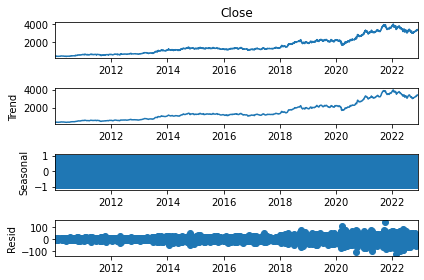

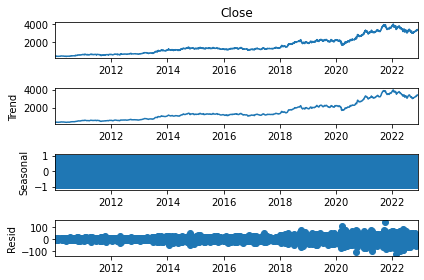

In [ ]:
s_dec_add = seasonal_decompose(df1.Close, model = 'additive')
s_dec_add.plot()

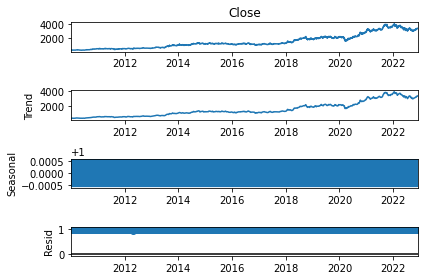

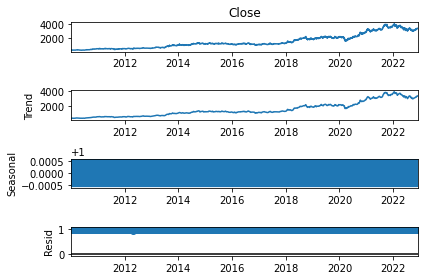

In [ ]:
s_dec_mul = seasonal_decompose(df1.Close, model = 'multiplicative')
s_dec_mul.plot()

Visualising the returns and volatility of the given stock

In [ ]:
df1['returns'] = df1.Close.pct_change(1)*100
df1['sq_returns'] = df1.returns.mul(df1.returns)

Text(0.5, 1.0, 'Graph for returns of the TCS stock')

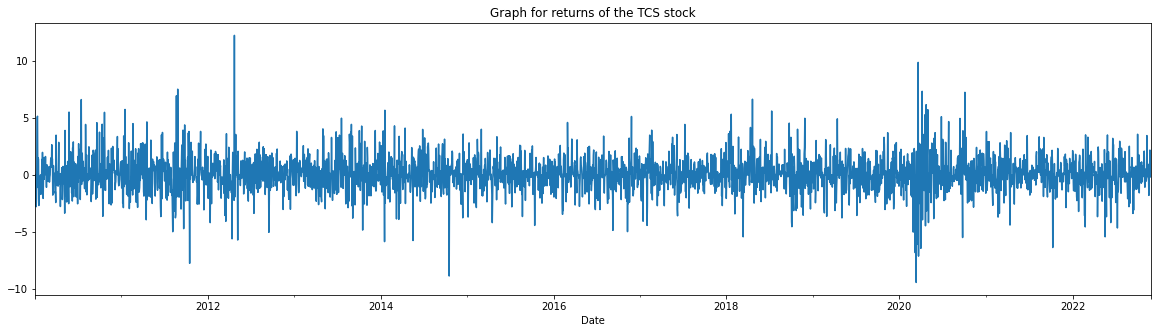

In [ ]:
df1.returns.plot(figsize = (20,5))
plt.title("Graph for returns of the TCS stock")

Text(0.5, 1.0, 'Graph for Volatility of the TCS stock')

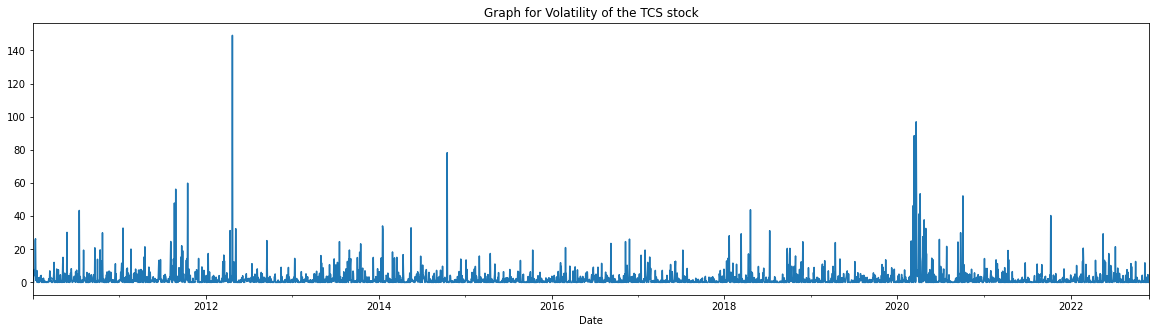

In [ ]:


df1.sq_returns.plot(figsize = (20,5))
plt.title("Graph for Volatility of the TCS stock")

## Smoothing

The data is not trend stationary, hence smoothing is not effective

In [ ]:
X = df['Close']
test = X.iloc[-30:]
train = X.iloc[:-30]

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
resu = []
temp_df = pd.DataFrame()
#df2 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE'])

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 3005100.9651611475
MAE is : 1731.199797954746
RMSE is : 1733.522703964718
MAPE is : 53.02995773701571
R2 is : -372.3868112211373

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 40236.88099873992
MAE is : 179.41197361420498
RMSE is : 200.59132832388323
MAPE is : 5.427968847447772
R2 is : -3.9994728509224027

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 38471.72313482474
MAE is : 174.42333104326661
RMSE is : 196.1420993433708
MAPE is : 5.274939351719677
R2 is : -3.780150214594987

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 35268.31055220955
MAE is : 164.98510790254312
RMSE is : 187.7985903893039
MAPE is : 4.985416398881128
R2 is : -3.3821229858545347

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 33668.89730693335
MAE is : 160.06458878945588
RMSE is : 183.49086436913788
MAPE is : 4.834476629617486
R2 is : -3.1833942847553



<ipython-input-28-00e19ae56d4a>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
<ipython-input-28-00e19ae56d4a>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
<ipython-input-28-00e19ae56d4a>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
<ipython-input-28-00e19ae56d4a>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
<ipython-input-28-00e19ae56d4a>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas

Evaluation metric results:-
MSE is : 31472.021249597994
MAE is : 153.04834702473025
RMSE is : 177.40355478286784
MAPE is : 4.619249356086759
R2 is : -2.91043022956838

Fitting for smoothing level= 0.9
Evaluation metric results:-
MSE is : 31109.803425933336
MAE is : 151.86039214797776
RMSE is : 176.37971375964227
MAPE is : 4.582808153264131
R2 is : -2.865424301410371

Fitting for smoothing level= 1
Evaluation metric results:-
MSE is : 30739.6261442105
MAE is : 150.63665364583332
RMSE is : 175.32719738879788
MAPE is : 4.545269267039418
R2 is : -2.819429402599513



<ipython-input-28-00e19ae56d4a>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
<ipython-input-28-00e19ae56d4a>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)


,smoothing parameter,RMSE
10,1.0,175.327197
9,0.9,176.379714
8,0.8,177.403555
7,0.7,178.466650
6,0.6,179.665490
5,0.5,181.182999
4,0.4,183.490864
3,0.3,187.798590
2,0.2,196.142099
1,0.1,200.591328


Simple Exponential Smoothing

In [ ]:
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 40236.88099873992
MAE is : 179.41197361420498
RMSE is : 200.59132832388323
MAPE is : 5.427968847447772
R2 is : -3.9994728509224027



In [ ]:
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 30758.915199247436
MAE is : 150.70066514999755
RMSE is : 175.3821974980569
MAPE is : 4.547232856946644
R2 is : -2.8218260870487906



In [ ]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,3157
Model:,SimpleExpSmoothing,SSE,2411719.792
Optimized:,True,AIC,20961.660
Trend:,None,BIC,20973.775
Seasonal:,None,AICC,20961.672
Seasonal Periods:,None,Date:,"Wed, 21 Dec 2022"
Box-Cox:,False,Time:,17:18:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9949113,alpha,True
initial_level,375.82501,l.0,True


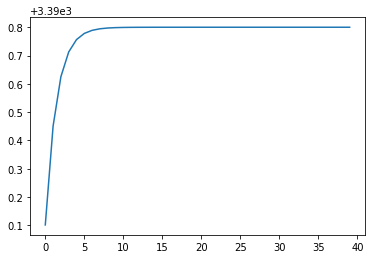

In [ ]:
def exponential_smoothing(df1, H, alpha=0.5):
    """
    Given a series and alpha, return series of smoothed points
    Set S_2 = y_1 (there is no S_1), and
    S_t = alpha * y_t-1 + (1-alpha) * S_t-1, where t >= 3. Note t starts from 1.
    Forecast S_t+1 = alpha * y_origin + (1-alpha) * S_t, where y_origin is the last known data point    
    Inputs
        series: series to forecast
        alpha : smoothing constant. 
                When alpha is close to 1, dampening is quick. 
                When alpha is close to 0, dampening is slow
        H     : forecast horizon
    Outputs
        result: the predictions. The length of result is H
    """
    result = [0, df1[0]] # initialization
    for n in range(1, len(df)+H-1):
        if n >= len(df.Close): # we are forecasting
            result.append(alpha * df1[-1] + (1 - alpha) * result[n])
        else:
            result.append(alpha * df1[n] + (1 - alpha) * result[n]) 
            # result[2] is the forecast using series[1],  ie. result[2] is the estimate of series[2]
    return result[len(df1):len(df1)+H]

e = exponential_smoothing(X,40,alpha=0.5)

plt.plot(e)

In [ ]:
def double_exponential_smoothing(series, H, alpha=0.3, beta=0.3, return_all=False):
    """
    Given a series and alpha, return series of smoothed points
    Initialization: 
    S_1 = y_1, 
    b_1 = y_2 - y_1, 
    F_1 = 0, F_2 = y_1
    level, S_t = alpha*y_t + (1-alpha)*(S_t-1 + b_t-1)
    trend, b_t = beta*(S_t - S_t-1) + (1-beta)*b_t-1
    forecast, F_t+1 = S_t + b_t
    forecast, F_t+m = S_t + m*b_t
    result[len(series)] is the estimate of series[len(series)]
    Inputs
        series: series to forecast
        H     : forecast horizon
        alpha : smoothing constant. 
                When alpha is close to 1, dampening is quick. 
                When alpha is close to 0, dampening is slow
        beta  : smoothing constant for trend
        return_all : if 1 return both original series + predictions, if 0 return predictions only
    Outputs
        the predictions of length H
    """
    result = [0, series[0]]   
    level = series[0]
    trend = series[1] - series[0]
    for n in range(1, len(series)+H-1):            
        if n >= len(series): # we are forecasting
            m = n - len(series) + 2
            result.append(level + m*trend) # result[len(series)+1] is the estimate of series[len(series)+1]
        else:
            value = series[n]
            last_level, level = level, alpha*value + (1-alpha)*(level+trend)
            trend = beta*(level-last_level) + (1-beta)*trend
            result.append(level+trend) 
            # e.g. result[2] uses series[1] 
            # ie. result[2] is the estimate of series[2]
            # e.g. result[len(series)] uses series[len(series)-1] 
            # ie. result[len(series)] is the estimate of series[len(series)]
    
    if return_all == True:
        return result
    else:
        return result[len(series):len(series)+H]

f = double_exponential_smoothing(X, 40, alpha=0.3, beta=0.3, return_all=False)


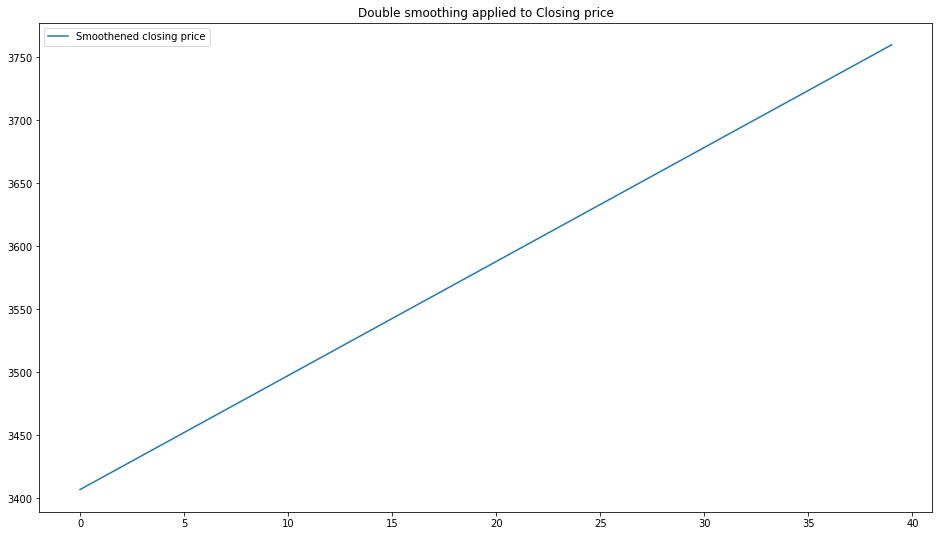

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.title("Double smoothing applied to Closing price")
plt.plot( f, label='Smoothened closing price')
plt.legend(loc='best')
plt.show()

## Testing Stationarity

Using the AD Fuller test to check for stationarity

In [ ]:
sts.adfuller(df1.Close)
#This shows that the data is not stationary in accordance to the AD Fuller test

(0.06547230209987938,
 0.9636231138618678,
 29,
 3338,
 {'1%': -3.4323105559882356,
  '5%': -2.8624062588429413,
  '10%': -2.5672311268789305},
 31474.671942321842)

## JUSTIFICATION WHY IT IS A TIME SERIES PROBLEM.

The dataset that we have selected is of a stock that is traded in the indian equity market and the price of the stock is subject to market fluctuations on a daily basis. The data is non-stationary, is not normally distributed and is updated at certain time intervals (daily). Hence the following problem is a time series problem

## IMPLEMENTATION AND INTERPRETATION FOR FORECAST

In [ ]:
size = int(len(df.Close)*0.8)
df_tr,df_te = df1.Close.iloc[:size], df1.Close.iloc[size:]

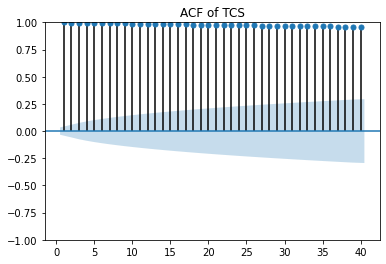

In [ ]:
#ACF
sgt.plot_acf(df1.Close, lags =40, zero = False)
plt.title("ACF of TCS")
plt.show() 

The PACF plot shows that the series has significant lag values upto 3 lags, we will use this for fitting our future models.

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


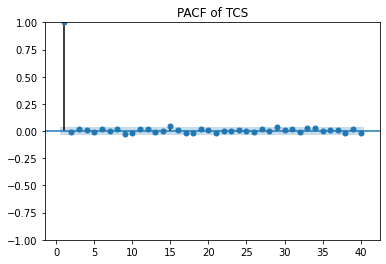

In [ ]:
#PACF
sgt.plot_pacf(df1.Close, lags =40, zero = False)
plt.title("PACF of TCS")
plt.show() 

For model slection, we fit our data on several different moels, namely; AR, MA, ARMA, ARIMA, ARCH, GARCH. We use AIC and log-likelihood to detrmine our best fit model. The lower the information criteria and higher the LLR, the better the model is

### AR models

In [ ]:
def LLR_test(mod_1, mod_2, DF=1):
  L1 = mod_1.fit().llf
  L2 = mod_2.fit().llf
  LR = (2*(L2-L1))
  p = chi2.sf(LR, DF).round(3)
  return p

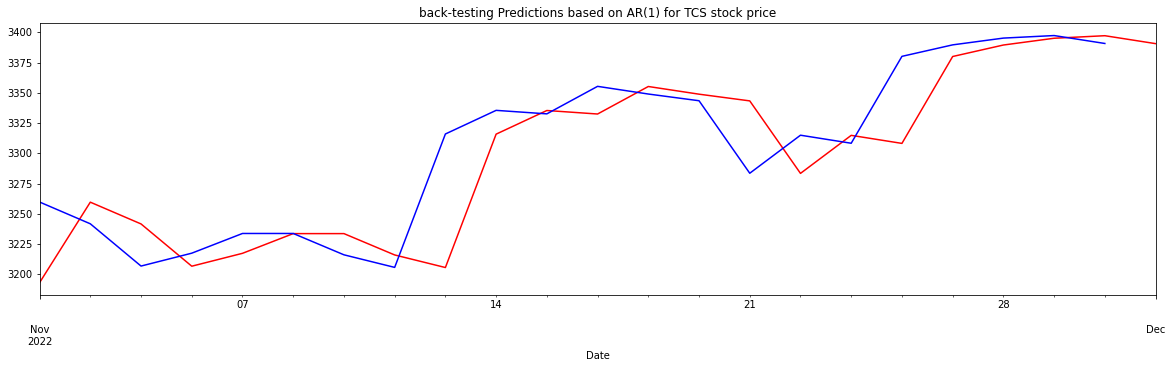

In [ ]:
model_ar =  ARIMA(df1.Close, order = (1,0,0))
result_ar = model_ar.fit()
result_ar.summary()

df_pred = result_ar.predict(start = pred_start_date, end = pred_end_date)

df_pred[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "red")
df_te[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "blue")
plt.title("back-testing Predictions based on AR(1) for TCS stock price")
plt.show()

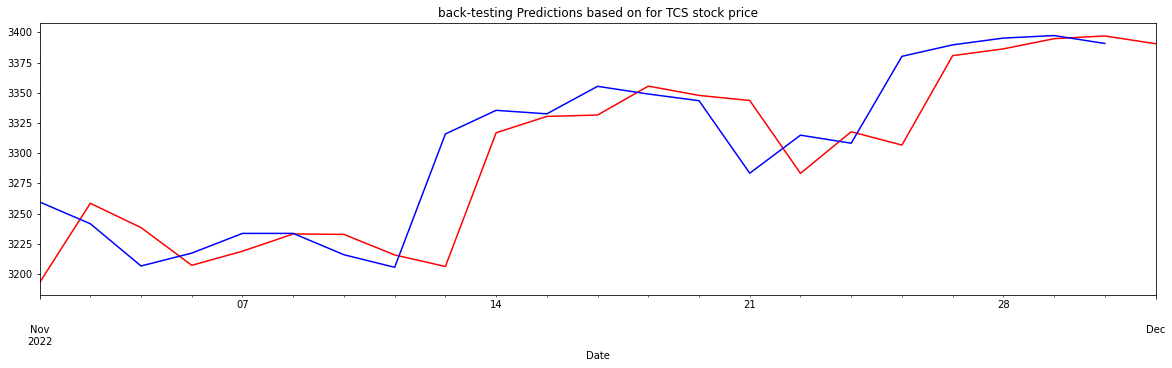

In [ ]:
model_ar3 =  ARIMA(df1.Close, order = (3,0,0))
result_ar3 = model_ar3.fit()
result_ar3.summary()

df_pred = result_ar3.predict(start = pred_start_date, end = pred_end_date)

df_pred[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "red")
df_te[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "blue")
plt.title("back-testing Predictions based on for TCS stock price")
plt.show()

In [ ]:
LLR_test(model_ar, model_ar3)
#This suggests that a higher order AR model is much better than a lower order one

0.009

###Moving Average models


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


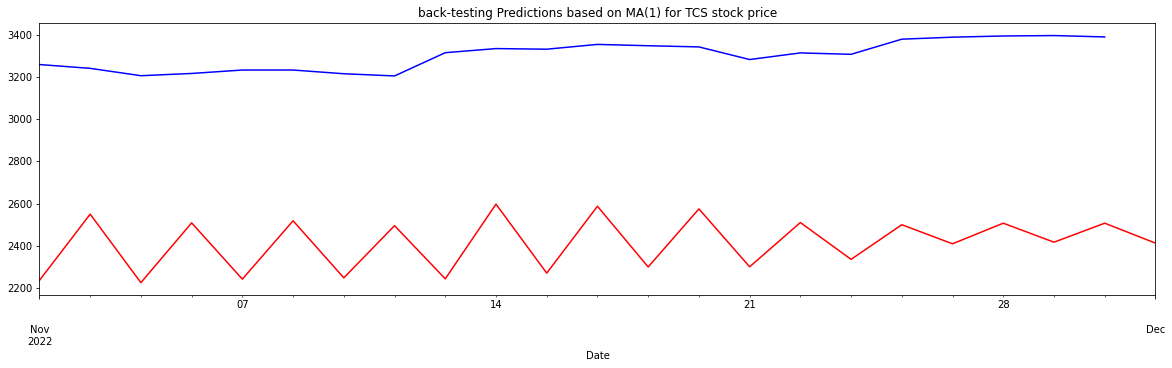

In [ ]:
model_ma =  ARIMA(df1.Close, order = (0,0,1))
result_ma = model_ma.fit()
result_ma.summary()

df_pred = result_ma.predict(start = pred_start_date, end = pred_end_date)

df_pred[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "red")
df_te[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "blue")
plt.title("back-testing Predictions based on MA(1) for TCS stock price")
plt.show()

In [ ]:
LLR_test(model_ma,model_ar)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.0

###ARMA model




In [ ]:
model_arma =  ARIMA(df1.Close, order = (1,0,1))
result_arma = model_arma.fit()
result_arma.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3368
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -15876.700
Date:                Wed, 21 Dec 2022   AIC                          31761.400
Time:                        17:20:12   BIC                          31785.889
Sample:                    01-04-2010   HQIC                         31770.157
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1547.4315      0.001   2.53e+06      0.000    1547.430    1547.433
ar.L1          0.9999      0.000   5413.190      0.000       1.000       1.000
ma.L1          0.0054      0.011      0.477      0.633      -0.017       0.028
sigma2       726.6937      7.555     96.186      0.000     711.886     741.501
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12047.29
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              13.34   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.19e+20. Standard errors may be unstable.
"""

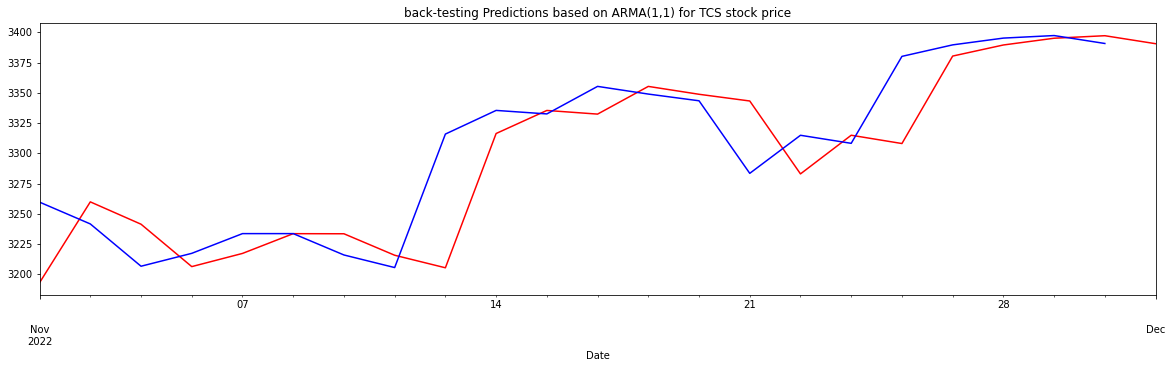

In [ ]:
df_pred = result_arma.predict(start = pred_start_date, end = pred_end_date)

df_pred[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "red")
df_te[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "blue")
plt.title("back-testing Predictions based on ARMA(1,1) for TCS stock price")
plt.show()

In [ ]:
model_arma33 =  ARIMA(df1.Close, order = (3,0,3))
result_arma33 = model_arma33.fit()
result_arma33.summary()



/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3368
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -15866.347
Date:                Wed, 21 Dec 2022   AIC                          31748.695
Time:                        17:20:22   BIC                          31797.671
Sample:                    01-04-2010   HQIC                         31766.208
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1547.4315      6e-05   2.58e+07      0.000    1547.431    1547.432
ar.L1          1.1500      0.028     41.678      0.000       1.096       1.204
ar.L2         -1.0668      0.043    -25.094      0.000      -1.150      -0.984
ar.L3          0.9168      0.027     34.277      0.000       0.864       0.969
ma.L1         -0.1458      0.030     -4.790      0.000      -0.206      -0.086
ma.L2          0.8846      0.031     28.655      0.000       0.824       0.945
ma.L3         -0.0035      0.012     -0.288      0.774      -0.028       0.020
sigma2       720.8487      7.483     96.327      0.000     706.182     735.516
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11978.09
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              13.19   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.68e+20. Standard errors may be unstable.
"""

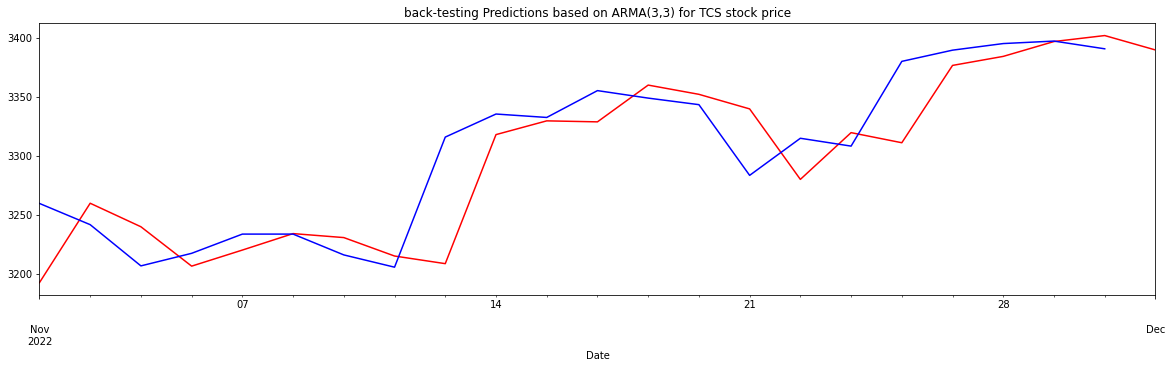

In [ ]:
df_pred = result_arma33.predict(start = pred_start_date, end = pred_end_date)

df_pred[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "red")
df_te[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "blue")
plt.title("back-testing Predictions based on ARMA(3,3) for TCS stock price")
plt.show()

In [ ]:
LLR_test(model_arma,model_arma33)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.0

In [ ]:
model_arma31 =  ARIMA(df1.Close, order = (3,0,1))
result_arma31 = model_arma31.fit()
result_arma31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3368
Model:                 ARIMA(3, 0, 1)   Log Likelihood              -15872.537
Date:                Wed, 21 Dec 2022   AIC                          31757.074
Time:                        17:20:34   BIC                          31793.806
Sample:                    01-04-2010   HQIC                         31770.209
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1547.4315   2001.780      0.773      0.440   -2375.985    5470.848
ar.L1          1.2424      0.209      5.951      0.000       0.833       1.652
ar.L2         -0.2908      0.207     -1.406      0.160      -0.696       0.115
ar.L3          0.0483      0.010      4.659      0.000       0.028       0.069
ma.L1         -0.2377      0.209     -1.139      0.255      -0.647       0.171
sigma2       725.0966      7.728     93.833      0.000     709.951     740.242
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             11811.89
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              13.23   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

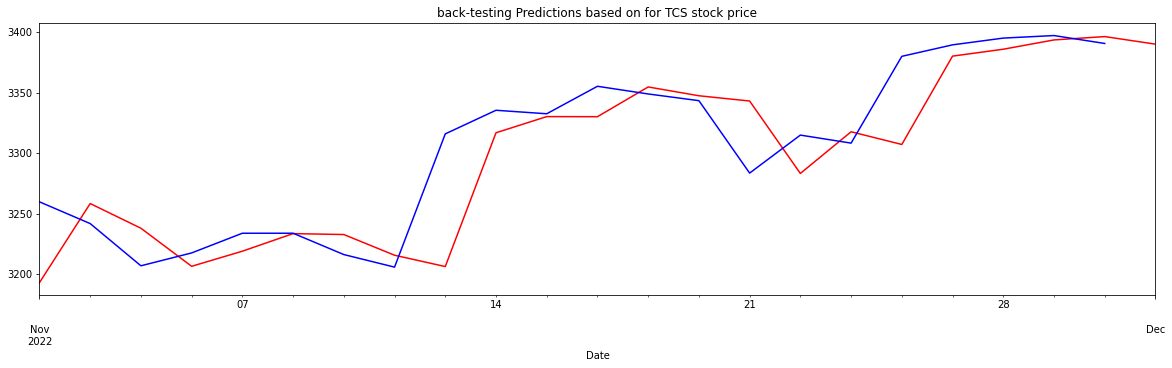

In [ ]:
df_pred = result_arma31.predict(start = pred_start_date, end = pred_end_date)

df_pred[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "red")
df_te[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "blue")
plt.title("back-testing Predictions based on for TCS stock price")
plt.show()

In [ ]:
model_arma13 =  ARIMA(df1.Close, order = (1,0,3))
result_arma13 = model_arma13.fit()
result_arma13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3368
Model:                 ARIMA(1, 0, 3)   Log Likelihood              -15873.133
Date:                Wed, 21 Dec 2022   AIC                          31758.266
Time:                        17:20:36   BIC                          31794.998
Sample:                    01-04-2010   HQIC                         31771.401
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1547.4315      0.000   1.14e+07      0.000    1547.431    1547.432
ar.L1          1.0000   2.76e-05   3.62e+04      0.000       1.000       1.000
ma.L1          0.0051      0.011      0.448      0.654      -0.017       0.027
ma.L2         -0.0437      0.010     -4.315      0.000      -0.064      -0.024
ma.L3         -0.0236      0.011     -2.239      0.025      -0.044      -0.003
sigma2       724.0560      7.566     95.697      0.000     709.227     738.885
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             11985.45
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              13.26   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.53e+21. Standard errors may be unstable.
"""

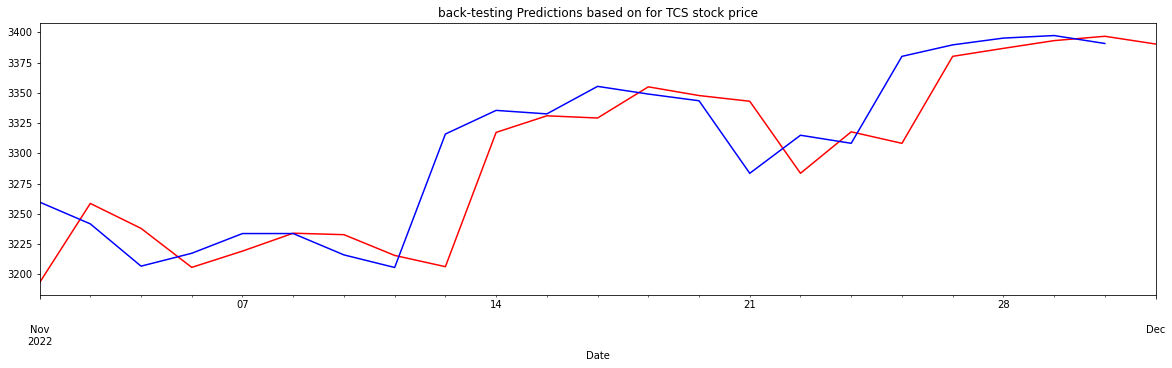

In [ ]:
df_pred = result_arma13.predict(start = pred_start_date, end = pred_end_date)

df_pred[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "red")
df_te[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "blue")
plt.title("back-testing Predictions based on for TCS stock price")
plt.show()

In [ ]:
LLR_test(model_arma31,model_arma33)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.0

###ARIMA Model


In [ ]:
model_arima111 =  ARIMA(df1.Close, order = (1,1,1))
result_arima111 = model_arima111.fit()
result_arima111.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3368
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15867.245
Date:                Wed, 21 Dec 2022   AIC                          31740.490
Time:                        17:20:48   BIC                          31758.855
Sample:                    01-04-2010   HQIC                         31747.057
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7058      0.234      3.019      0.003       0.248       1.164
ma.L1         -0.7208      0.228     -3.156      0.002      -1.168      -0.273
sigma2       725.8119      7.528     96.410      0.000     711.056     740.567
===================================================================================
Ljung-Box (L1) (Q):                   1.11   Jarque-Bera (JB):             12035.43
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):              13.36   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

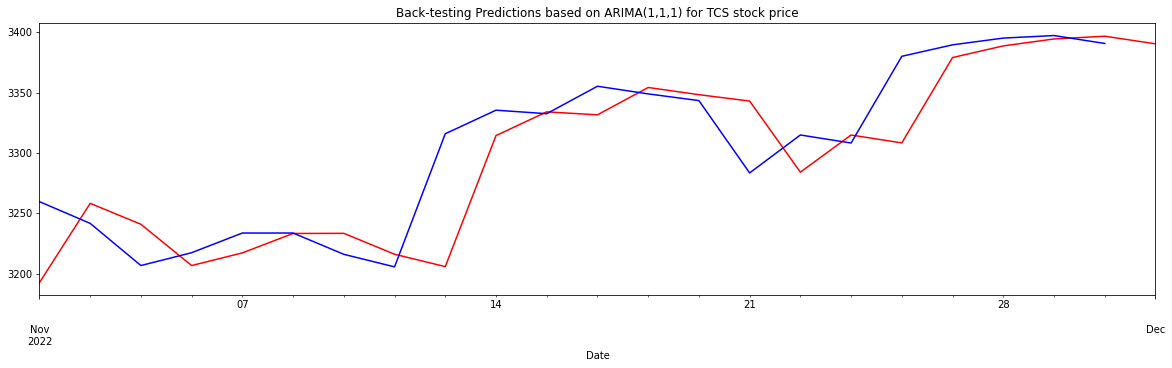

In [ ]:
df_pred = result_arima111.predict(start = pred_start_date, end = pred_end_date)

df_pred[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "red")
df_te[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "blue")
plt.title("Back-testing Predictions based on ARIMA(1,1,1) for TCS stock price")
plt.show()

In [ ]:
model_arima313 =  ARIMA(df1.Close, order = (3,1,3))
result_arima313 = model_arima313.fit()
result_arima313.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3368
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -15854.543
Date:                Wed, 21 Dec 2022   AIC                          31723.087
Time:                        17:20:54   BIC                          31765.939
Sample:                    01-04-2010   HQIC                         31738.411
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1115      0.130     -8.519      0.000      -1.367      -0.856
ar.L2         -1.1465      0.026    -43.830      0.000      -1.198      -1.095
ar.L3         -0.8953      0.127     -7.058      0.000      -1.144      -0.647
ma.L1          1.1330      0.127      8.947      0.000       0.885       1.381
ma.L2          1.1787      0.027     43.645      0.000       1.126       1.232
ma.L3          0.9145      0.125      7.322      0.000       0.670       1.159
sigma2       703.9072      7.461     94.349      0.000     689.284     718.530
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):             11377.51
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):              13.18   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

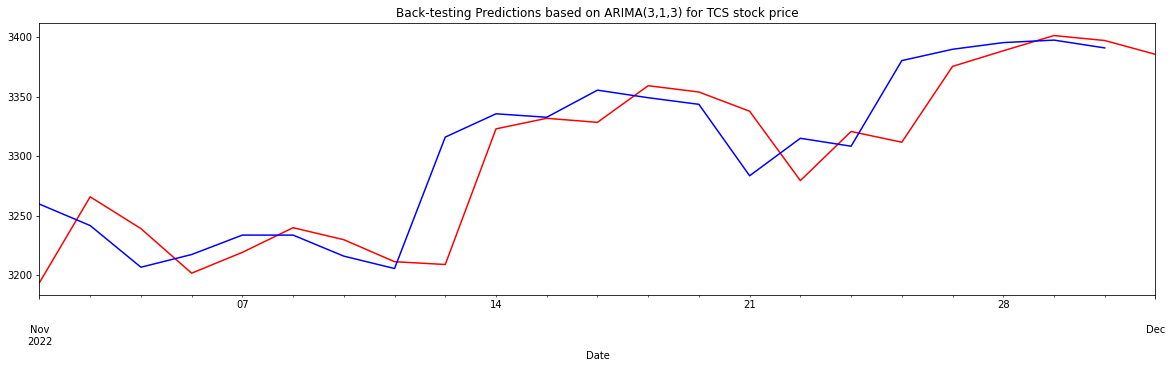

In [ ]:
df_pred = result_arima313.predict(start = pred_start_date, end = pred_end_date)

df_pred[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "red")
df_te[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "blue")
plt.title("Back-testing Predictions based on ARIMA(3,1,3) for TCS stock price")
plt.show()

In [ ]:
model_arima311 =  ARIMA(df1.Close, order = (3,1,1))
result_arima311 = model_arima311.fit()
result_arima311.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3368
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -15862.914
Date:                Wed, 21 Dec 2022   AIC                          31735.828
Time:                        17:20:55   BIC                          31766.437
Sample:                    01-04-2010   HQIC                         31746.773
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4683      0.282     -1.662      0.096      -1.020       0.084
ar.L2         -0.0432      0.012     -3.740      0.000      -0.066      -0.021
ar.L3         -0.0480      0.014     -3.419      0.001      -0.075      -0.020
ma.L1          0.4728      0.281      1.685      0.092      -0.077       1.023
sigma2       723.9263      7.575     95.572      0.000     709.080     738.772
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12058.59
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              13.22   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

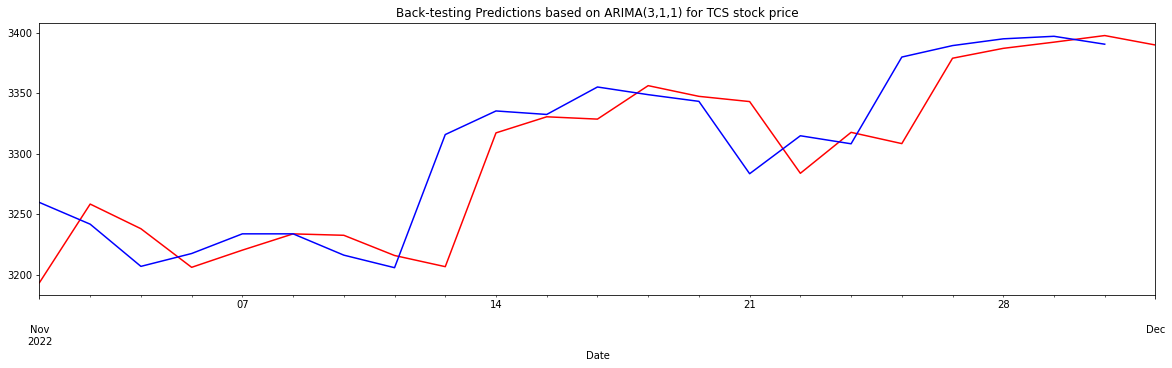

In [ ]:
df_pred = result_arima311.predict(start = pred_start_date, end = pred_end_date)

df_pred[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "red")
df_te[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "blue")
plt.title("Back-testing Predictions based on ARIMA(3,1,1) for TCS stock price")
plt.show()

In [ ]:
model_arima312 =  ARIMA(df1.Close, order = (3,1,2))
result_arima312 = model_arima312.fit()
result_arima312.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3368
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -15856.796
Date:                Wed, 21 Dec 2022   AIC                          31725.591
Time:                        17:20:58   BIC                          31762.322
Sample:                    01-04-2010   HQIC                         31738.726
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0818      0.034     -2.410      0.016      -0.148      -0.015
ar.L2         -0.8895      0.031    -28.917      0.000      -0.950      -0.829
ar.L3         -0.0296      0.013     -2.343      0.019      -0.054      -0.005
ma.L1          0.0868      0.032      2.681      0.007       0.023       0.150
ma.L2          0.8730      0.032     26.986      0.000       0.810       0.936
sigma2       722.4352      7.505     96.266      0.000     707.726     737.144
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             12005.78
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              13.29   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

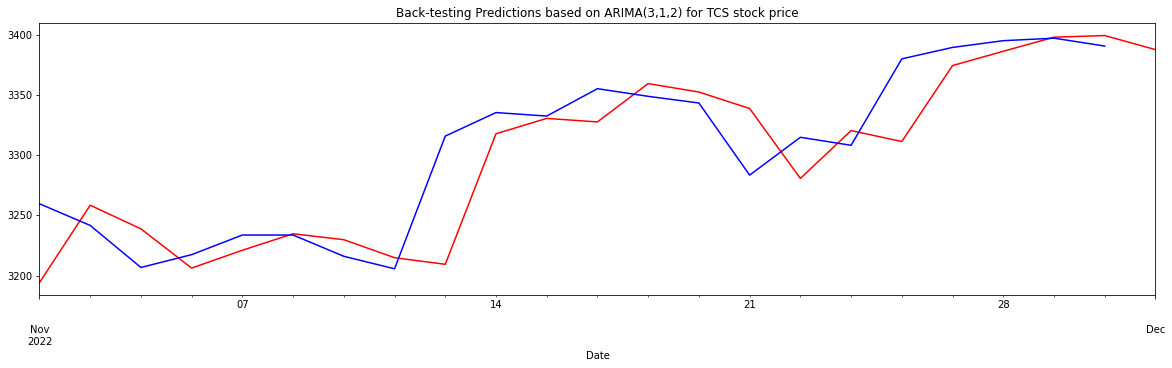

In [ ]:
df_pred = result_arima312.predict(start = pred_start_date, end = pred_end_date)
df_pred[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "red")
df_te[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "blue")
plt.title("Back-testing Predictions based on ARIMA(3,1,2) for TCS stock price")
plt.show()

In [ ]:
model_arima213 =  ARIMA(df1.Close, order = (2,1,3))
result_arima213 = model_arima213.fit()
result_arima213.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3368
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -15856.046
Date:                Wed, 21 Dec 2022   AIC                          31724.092
Time:                        17:21:04   BIC                          31760.823
Sample:                    01-04-2010   HQIC                         31737.227
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1434      0.016     -9.124      0.000      -0.174      -0.113
ar.L2         -0.9417      0.016    -60.609      0.000      -0.972      -0.911
ma.L1          0.1493      0.020      7.534      0.000       0.110       0.188
ma.L2          0.9373      0.016     57.612      0.000       0.905       0.969
ma.L3         -0.0242      0.012     -2.001      0.045      -0.048      -0.000
sigma2       718.2693      7.560     95.010      0.000     703.452     733.086
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             11851.35
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              13.25   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

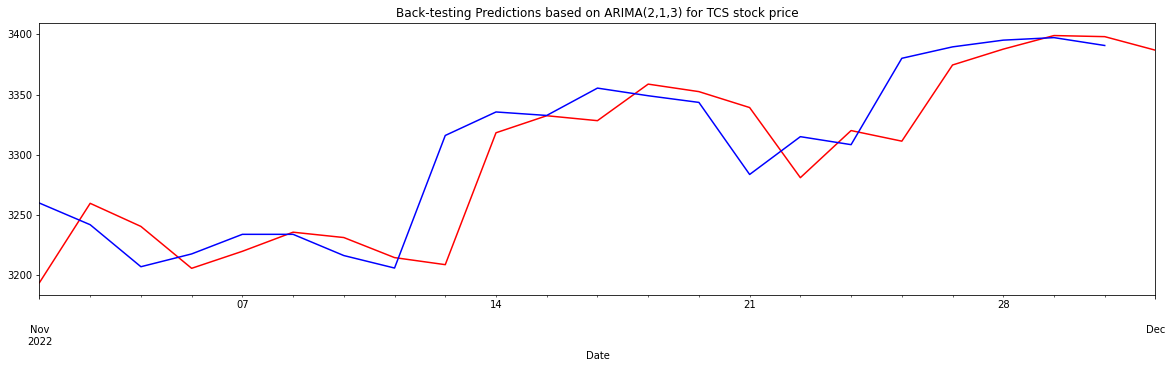

In [ ]:
df_pred = result_arima213.predict(start = pred_start_date, end = pred_end_date)
df_pred[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "red")
df_te[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "blue")
plt.title("Back-testing Predictions based on ARIMA(2,1,3) for TCS stock price")
plt.show()

###ARCH and GARCH models

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF of returns')

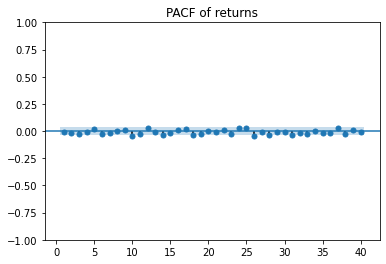

In [ ]:
sgt.plot_pacf(df1.returns[1:], lags = 40, alpha = 0.05, zero = False)
plt.title("PACF of returns")


The PACF plot of volatility has seven significant lag values, we will use that to train our ARCH and GARCH models accordingly


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF of volatility')

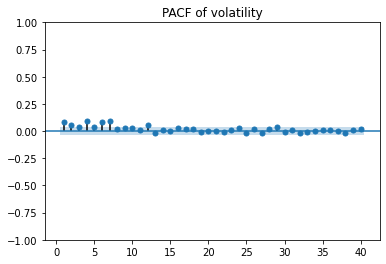

In [ ]:
sgt.plot_pacf(df1.sq_returns[1:], lags = 40, alpha = 0.05, zero = False)
plt.title("PACF of volatility")

In [ ]:
model_arch1 =  arch_model(df1.Close, mean = 'Constant', vol = 'ARCH', p=1)
result_arch1 = model_arch1.fit()
result_arch1.summary()

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.003e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      5,   Neg. LLF: 39145.975796348415
Iteration:      2,   Func. Count:     10,   Neg. LLF: 26512.107882214805
Iteration:      3,   Func. Count:     14,   Neg. LLF: 26260.28544081781
Iteration:      4,   Func. Count:     18,   Neg. LLF: 26340.405408062885
Iteration:      5,   Func. Count:     23,   Neg. LLF: 25946.41538748314
Iteration:      6,   Func. Count:     27,   Neg. LLF: 25945.909374349525
Iteration:      7,   Func. Count:     31,   Neg. LLF: 25945.899865424675
Iteration:      8,   Func. Count:     35,   Neg. LLF: 25945.89979393314
Iteration:      9,   Func. Count:     39,   Neg. LLF: 25945.89974906925
Iteration:     10,   Func. Count:     43,   Neg. LLF: 25945.899593779854
Iteration:     11,   Func. Count:     47,   Neg. LLF: 25945.89918623846
Iteration:     12,   Func. Count:     51,   Neg. LLF: 25945.89774969426
Iteration:     13,   Func. Count:     55,   Neg. LLF: 25945.89526883217
Iteration:     14,   Func. Count:     59,   Neg. LLF: 2594

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -24480.1
Distribution:                  Normal   AIC:                           48966.2
Method:            Maximum Likelihood   BIC:                           48984.5
                                        No. Observations:                 3368
Date:                Wed, Dec 21 2022   Df Residuals:                     3367
Time:                        17:21:05   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          1249.3995      2.157    579.293      0.000 [1.245e+03,1.254e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega        157.5920     19.172      8.220  2.039e-16 [1.200e+02,1.952e+02]
alpha[1]       1.0000  5.888e-03    169.830      0.000     [  0.988,  1.012]
============================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch7 =  arch_model(df1.Close, mean = 'Constant', vol = 'ARCH', p=7)
result_arch7 = model_arch7.fit()
result_arch7.summary()

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.003e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     11,   Neg. LLF: 39145.976200699835
Iteration:      2,   Func. Count:     22,   Neg. LLF: 26322.813451266724
Iteration:      3,   Func. Count:     32,   Neg. LLF: 26516.612389074107
Iteration:      4,   Func. Count:     43,   Neg. LLF: 25947.759407365797
Iteration:      5,   Func. Count:     53,   Neg. LLF: 25945.92627633219
Iteration:      6,   Func. Count:     63,   Neg. LLF: 25945.899827267956
Iteration:      7,   Func. Count:     73,   Neg. LLF: 25945.899792566364
Iteration:      8,   Func. Count:     83,   Neg. LLF: 25945.899987053817
Iteration:      9,   Func. Count:     94,   Neg. LLF: 25945.899415574575
Iteration:     10,   Func. Count:    104,   Neg. LLF: 25945.897907212795
Iteration:     11,   Func. Count:    114,   Neg. LLF: 25945.890860424217
Iteration:     12,   Func. Count:    124,   Neg. LLF: 25945.86053785305
Iteration:     13,   Func. Count:    134,   Neg. LLF: 25945.774269377245
Iteration:     14,   Func. Count:    144,   Neg. LLF:

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -24477.6
Distribution:                  Normal   AIC:                           48973.1
Method:            Maximum Likelihood   BIC:                           49028.2
                                        No. Observations:                 3368
Date:                Wed, Dec 21 2022   Df Residuals:                     3367
Time:                        17:21:05   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          1249.0776      1.924    649.233      0.000 [1.245e+03,1.253e+03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        124.6156     24.785      5.028  4.960e-07    [ 76.038,1.732e+02]
alpha[1]       0.9689  7.377e-02     13.133  2.127e-39      [  0.824,  1.113]
alpha[2]   1.3372e-13  3.581e-02  3.734e-12      1.000 [-7.018e-02,7.018e-02]
alpha[3]   1.0985e-13      0.140  7.840e-13      1.000      [ -0.275,  0.275]
alpha[4]   2.7500e-13      0.134  2.049e-12      1.000      [ -0.263,  0.263]
alpha[5]       0.0233  6.750e-02      0.345      0.730      [ -0.109,  0.156]
alpha[6]   1.0522e-13  3.592e-02  2.929e-12      1.000 [-7.040e-02,7.040e-02]
alpha[7]   7.8272e-03  2.251e-02      0.348      0.728 [-3.630e-02,5.195e-02]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch11 =  arch_model(df1.Close, mean = 'Constant', vol = 'GARCH', p=1, q=1)
result_garch11 = model_garch11.fit()
result_garch11.summary()

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.003e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 103795.95412699878
Iteration:      2,   Func. Count:     13,   Neg. LLF: 26333.54409732994
Iteration:      3,   Func. Count:     18,   Neg. LLF: 26169.6152712229
Iteration:      4,   Func. Count:     24,   Neg. LLF: 25369.87124609181
Iteration:      5,   Func. Count:     29,   Neg. LLF: 25288.671485875457
Iteration:      6,   Func. Count:     34,   Neg. LLF: 25248.831833105163
Iteration:      7,   Func. Count:     39,   Neg. LLF: 25248.05358735973
Iteration:      8,   Func. Count:     44,   Neg. LLF: 25247.955512696022
Iteration:      9,   Func. Count:     49,   Neg. LLF: 25247.713884648343
Iteration:     10,   Func. Count:     54,   Neg. LLF: 25247.448733903606
Iteration:     11,   Func. Count:     59,   Neg. LLF: 25247.3064639168
Iteration:     12,   Func. Count:     64,   Neg. LLF: 25247.275535602465
Iteration:     13,   Func. Count:     69,   Neg. LLF: 25247.273076862555
Iteration:     14,   Func. Count:     74,   Neg. LLF: 2524

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -24480.0
Distribution:                  Normal   AIC:                           48968.0
Method:            Maximum Likelihood   BIC:                           48992.5
                                        No. Observations:                 3368
Date:                Wed, Dec 21 2022   Df Residuals:                     3367
Time:                        17:21:06   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          1249.4616      2.141    583.693      0.000 [1.245e+03,1.254e+03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        151.6071     23.010      6.589  4.433e-11  [1.065e+02,1.967e+02]
alpha[1]       0.9857  2.629e-02     37.485 1.592e-307      [  0.934,  1.037]
beta[1]        0.0143  2.626e-02      0.546      0.585 [-3.712e-02,6.581e-02]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch71 =  arch_model(df1.Close, mean = 'Constant', vol = 'GARCH', p=7, q=1)
result_garch71 = model_garch71.fit()
result_garch71.summary()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 103796.12494419074
Iteration:      2,   Func. Count:     25,   Neg. LLF: 26328.392801281883
Iteration:      3,   Func. Count:     36,   Neg. LLF: 26174.90731572068
Iteration:      4,   Func. Count:     48,   Neg. LLF: 25406.804058645524
Iteration:      5,   Func. Count:     59,   Neg. LLF: 25274.036021581953
Iteration:      6,   Func. Count:     70,   Neg. LLF: 25251.21689466042
Iteration:      7,   Func. Count:     81,   Neg. LLF: 25250.48037997818


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.003e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      8,   Func. Count:     92,   Neg. LLF: 25249.606979219825
Iteration:      9,   Func. Count:    103,   Neg. LLF: 25247.869600652437
Iteration:     10,   Func. Count:    114,   Neg. LLF: 25247.385117336395
Iteration:     11,   Func. Count:    125,   Neg. LLF: 25247.27891468258
Iteration:     12,   Func. Count:    136,   Neg. LLF: 25247.276703093783
Iteration:     13,   Func. Count:    147,   Neg. LLF: 25247.27622452928
Iteration:     14,   Func. Count:    158,   Neg. LLF: 25247.272915385514
Iteration:     15,   Func. Count:    169,   Neg. LLF: 25247.260329134624
Iteration:     16,   Func. Count:    180,   Neg. LLF: 25247.23594742056
Iteration:     17,   Func. Count:    191,   Neg. LLF: 25247.178737482325
Iteration:     18,   Func. Count:    202,   Neg. LLF: 25247.007974489385
Iteration:     19,   Func. Count:    213,   Neg. LLF: 25246.5190171107
Iteration:     20,   Func. Count:    224,   Neg. LLF: 25245.396233313433
Iteration:     21,   Func. Count:    235,   Neg. LLF: 25

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -24477.6
Distribution:                  Normal   AIC:                           48975.1
Method:            Maximum Likelihood   BIC:                           49036.3
                                        No. Observations:                 3368
Date:                Wed, Dec 21 2022   Df Residuals:                     3367
Time:                        17:21:06   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          1249.0779      2.001    624.128      0.000 [1.245e+03,1.253e+03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        124.5583     63.873      1.950  5.116e-02    [ -0.630,2.497e+02]
alpha[1]       0.9688  8.365e-02     11.581  5.122e-31      [  0.805,  1.133]
alpha[2]       0.0000      0.384      0.000      1.000      [ -0.753,  0.753]
alpha[3]   7.0704e-11  4.114e-02  1.718e-09      1.000 [-8.064e-02,8.064e-02]
alpha[4]   1.1716e-10      0.127  9.248e-10      1.000      [ -0.248,  0.248]
alpha[5]       0.0233  8.829e-02      0.264      0.792      [ -0.150,  0.196]
alpha[6]   9.6340e-12  3.846e-02  2.505e-10      1.000 [-7.538e-02,7.538e-02]
alpha[7]   7.8431e-03  2.222e-02      0.353      0.724 [-3.570e-02,5.139e-02]
beta[1]        0.0000      0.400      0.000      1.000      [ -0.783,  0.783]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch77 =  arch_model(df1.Close, mean = 'Constant', vol = 'GARCH', p=7, q=7)
result_garch77 = model_garch77.fit()
result_garch77.summary()

Iteration:      1,   Func. Count:     18,   Neg. LLF: 103796.12774070002
Iteration:      2,   Func. Count:     37,   Neg. LLF: 25869.685287195593


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.003e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      3,   Func. Count:     54,   Neg. LLF: 25254.72711062347
Iteration:      4,   Func. Count:     71,   Neg. LLF: 25253.829122519157
Iteration:      5,   Func. Count:     88,   Neg. LLF: 25251.9529065092
Iteration:      6,   Func. Count:    105,   Neg. LLF: 25251.341102577324
Iteration:      7,   Func. Count:    122,   Neg. LLF: 25248.97536688447
Iteration:      8,   Func. Count:    139,   Neg. LLF: 25247.73280382267
Iteration:      9,   Func. Count:    156,   Neg. LLF: 25247.31951853129
Iteration:     10,   Func. Count:    173,   Neg. LLF: 25247.275732124523
Iteration:     11,   Func. Count:    190,   Neg. LLF: 25247.275021228634
Iteration:     12,   Func. Count:    207,   Neg. LLF: 25247.274774948146
Iteration:     13,   Func. Count:    224,   Neg. LLF: 25247.270971928003
Iteration:     14,   Func. Count:    241,   Neg. LLF: 25247.264855221634
Iteration:     15,   Func. Count:    258,   Neg. LLF: 25247.246397778414
Iteration:     16,   Func. Count:    275,   Neg. LLF: 252

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -24477.5
Distribution:                  Normal   AIC:                           48986.9
Method:            Maximum Likelihood   BIC:                           49084.9
                                        No. Observations:                 3368
Date:                Wed, Dec 21 2022   Df Residuals:                     3367
Time:                        17:21:07   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          1249.0624      2.307    541.377      0.000 [1.245e+03,1.254e+03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        118.6329    192.886      0.615      0.539 [-2.594e+02,4.967e+02]
alpha[1]       0.9677  3.954e-02     24.473 2.886e-132      [  0.890,  1.045]
alpha[2]   2.8351e-11      0.292  9.711e-11      1.000      [ -0.572,  0.572]
alpha[3]   5.1672e-11      0.283  1.827e-10      1.000      [ -0.554,  0.554]
alpha[4]   7.1358e-11      0.486  1.469e-10      1.000      [ -0.952,  0.952]
alpha[5]   2.7136e-11      0.206  1.320e-10      1.000      [ -0.403,  0.403]
alpha[6]   3.9328e-11      0.125  3.149e-10      1.000      [ -0.245,  0.245]
alpha[7]   2.9362e-11      0.261  1.126e-10      1.000      [ -0.511,  0.511]
beta[1]        0.0000      0.318      0.000      1.000      [ -0.623,  0.623]
beta[2]    4.6413e-11      0.284  1.632e-10      1.000      [ -0.557,  0.557]
beta[3]    6.7970e-11      0.378  1.797e-10      1.000      [ -0.741,  0.741]
beta[4]        0.0222      0.265  8.382e-02      0.933      [ -0.498,  0.542]
beta[5]    3.3404e-11      0.138  2.412e-10      1.000      [ -0.271,  0.271]
beta[6]        0.0101      0.305  3.308e-02      0.974      [ -0.587,  0.607]
beta[7]    2.3823e-11  3.569e-02  6.675e-10      1.000 [-6.996e-02,6.996e-02]
=============================================================================

Covariance estimator: robust
"""

### Final Model

We use ARIMA(3,1,2) as our final model 


### COMPARATIVE RESULT ANALYSIS

In [ ]:
aic = {
    "ARMA(1,1)" : 31790,
    'ARMA(3,3)' : 31779,
    'ARMA(3,1)' : 31786,
    'ARMA(1,3)' : 31785,
    'ARIMA(1,1,1)' : 31768,
    'ARIMA(3,1,3)' : 31754,
    'ARIMA(3,1,1)' : 31765,
    'ARIMA(3,1,2)': 31752,
    'ARCH(1)' : 49002,
    'ARCH(7)' : 490009,
    'GARCH(1,1)' : 49004,
    'GARCH(7,1)' : 49011,

}

print(aic)

{'ARMA(1,1)': 31790, 'ARMA(3,3)': 31779, 'ARMA(3,1)': 31786, 'ARMA(1,3)': 31785, 'ARIMA(1,1,1)': 31768, 'ARIMA(3,1,3)': 31754, 'ARIMA(3,1,1)': 31765, 'ARIMA(3,1,2)': 31752, 'ARCH(1)': 49002, 'ARCH(7)': 490009, 'GARCH(1,1)': 49004, 'GARCH(7,1)': 49011}


### Conclusion (Forecast)

In [ ]:
forecast_start = '2022-12-02'
forecast_end = '2023-01-01'

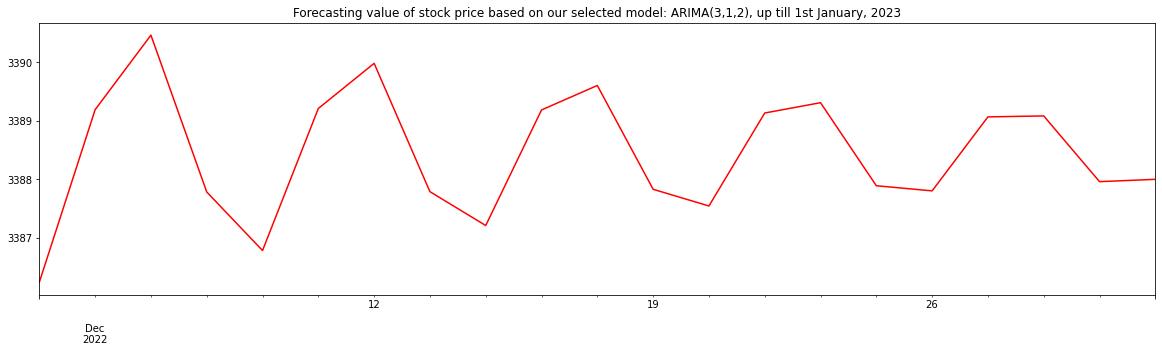

In [ ]:
df_fore = result_arima312.predict(start = forecast_start, end = forecast_end)
df_fore[forecast_start:forecast_end].plot(figsize = (20,5), color = "red")
# df_te[pred_start_date:pred_end_date].plot(figsize = (20,5), color = "blue")
plt.title("Forecasting value of stock price based on our selected model: ARIMA(3,1,2), up till 1st January, 2023")
plt.show()